In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, RocCurveDisplay, PrecisionRecallDisplay
)

df=pd.read_csv('pima-indians-diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   BloodPressure               768 non-null    int64  
 3   SkinThickness               768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   DiabetesPedigreeFunction    768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
X = df.drop(columns=['Outcome'])  # 'Outcome' is the target column
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7142857142857143
Precision: 0.6086956521739131
Recall: 0.5185185185185185
F1 Score: 0.5599999999999999

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



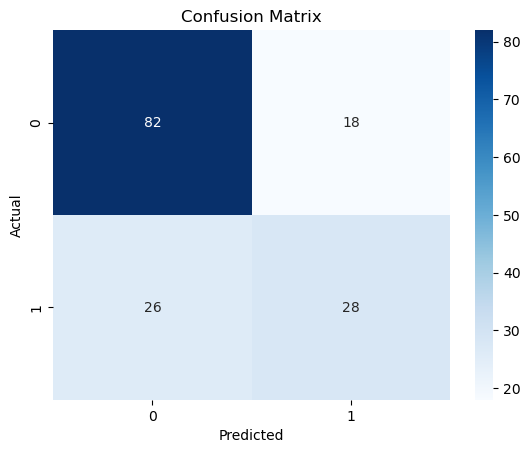

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

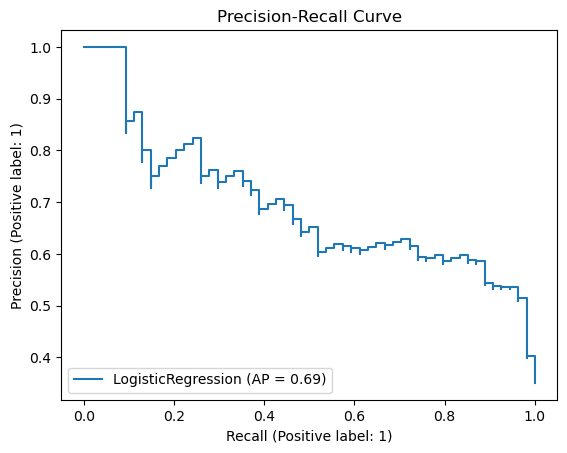

In [ ]:
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()

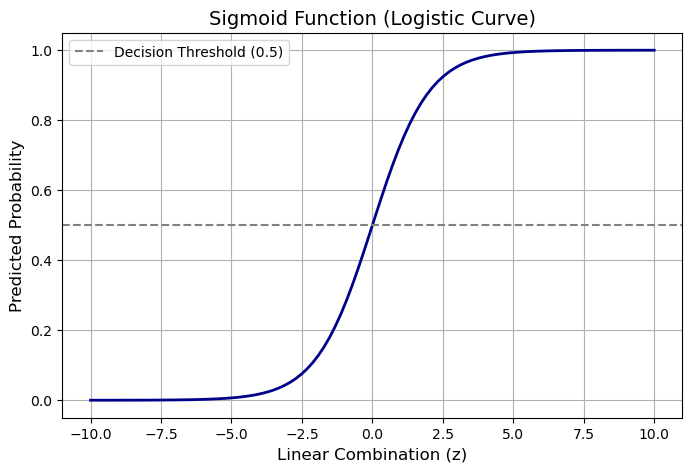

In [ ]:

# Generate input values (z) from -10 to 10
x = np.linspace(-10, 10, 100)

# Apply the sigmoid function
y = 1 / (1 + np.exp(-x))

# Plot the sigmoid curve
plt.figure(figsize=(8, 5)x, y, color='darkblue', linewidth=2)
plt.plot()3
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold (0.5)')
plt.title("Sigmoid Function (Logistic Curve)", fontsize=14)
plt.xlabel("Linear Combination (z)", fontsize=12)
plt.ylabel("Predicted Probability", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

c:\Users\nilak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


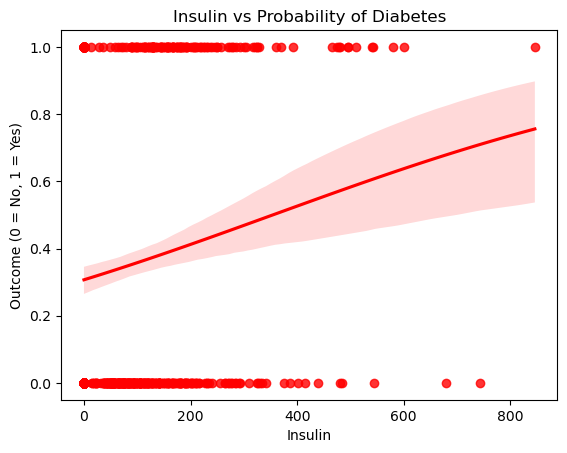

In [43]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)

# regression plot for Glucose vs Outcome
sns.regplot(
    x='Insulin',
    y='Outcome',
    data=df,
    logistic=True,   # logistic regression curve
    color="red"      # red curve
)
plt.title("Insulin vs Probability of Diabetes")
plt.xlabel("Insulin")
plt.ylabel("Outcome (0 = No, 1 = Yes)")
plt.show()


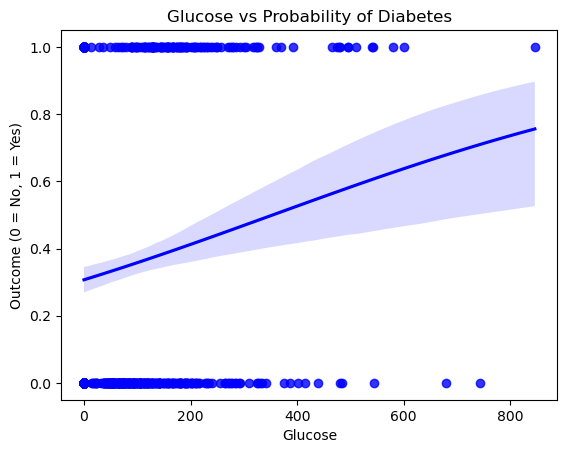

In [54]:
sns.regplot(
    x='Insulin',
    y='Outcome',
    data=df,
    logistic=True,   # logistic regression curve
    color="blue"      # red curve
)
plt.title("Glucose vs Probability of Diabetes")
plt.xlabel("Glucose")
plt.ylabel("Outcome (0 = No, 1 = Yes)")
plt.show()


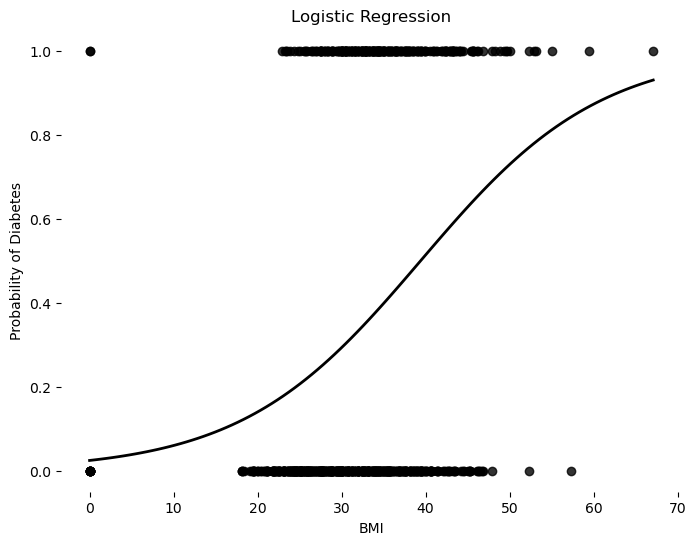

In [57]:
X = df['BMI']
y = df['Outcome']

plt.figure(figsize=(8,6))
sns.regplot(
    x=X,
    y=y,
    logistic=True,   
    ci=None,         
    scatter=True,    
    color='black',
    line_kws={'lw':2}  
)

plt.title('Logistic Regression')
plt.xlabel('BMI')
plt.ylabel('Probability of Diabetes')
plt.box(False)
plt.show()

<Axes: xlabel='Insulin', ylabel='Outcome'>

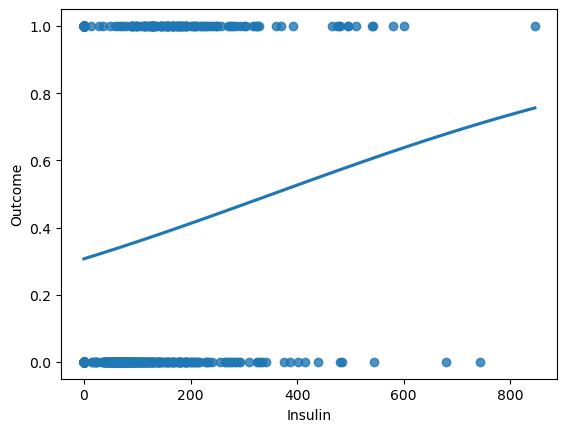

In [66]:
x = df['Insulin']
y = df['Outcome']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

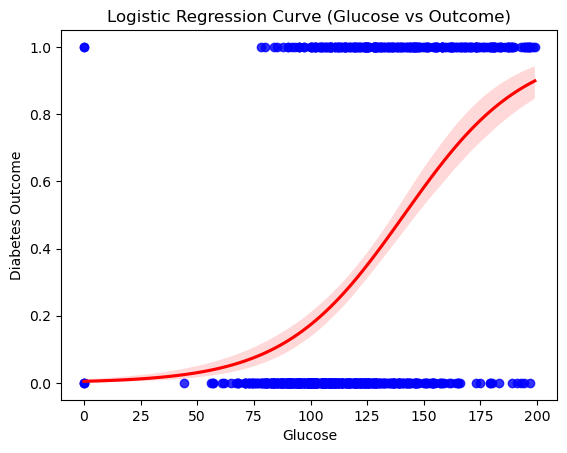

In [71]:

x = df['Glucose']
y = df['Outcome']

# Logistic regression curve (smooth)
sns.regplot(x=x, y=y, logistic=True,
            scatter_kws={"color": "blue"},
            line_kws={"color": "red"})

plt.title("Logistic Regression Curve (Glucose vs Outcome)")
plt.xlabel("Glucose")
plt.ylabel("Diabetes Outcome")
plt.show()